<a href="https://colab.research.google.com/github/Evgenius87/Data_Science_hw/blob/main/Hw_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В якості домашнього завдання вам пропонується створити нейронну мережу за допомогою механізмів Keras, яка буде класифікувати товари із датасету fasion_mnist.

Вам належить запропонувати свою власну архітектуру мережі. Точність найнаївнішої, але адекватної нейромережі становить приблизно 91%. Точність вашої моделі повинна бути не нижчою за цей показник. Щоб досягти таких значень вам знадобиться поекспериментувати з гіперпараметрами мережі:

кількість шарів;

кількість нейронів;

функції активації;

кількість епох;

розмір батчу;

вибір оптимізатора;

різні техніки регуляризації і т.д.

Використайте вивчені техніки виявлення проблем навчання нейронної мережі, і потім поекспериментуйте.

Рішення оформіть у вигляді окремого ноутбука.

завантаження датасету

In [26]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

Завантаження та підготовка даних

In [27]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

Створення архітектури моделі нейронної мережі

In [28]:
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(256, activation='relu'),
    # layers.Dropout(0.4),
    layers.Dense(10, activation='sigmoid')
])

підбір гіперпараметрів

In [29]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)
optimizer = keras.optimizers.Adam(learning_rate=0.001)
loss = 'sparse_categorical_crossentropy'
metrics = ['accuracy']
epochs = 30
batch_size = 512
validation_split = 0.2

In [30]:
model.compile(optimizer = optimizer,
              loss = loss,
              metrics = metrics)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 1024)              803840    
                                                                 
 dropout_6 (Dropout)         (None, 1024)              0         
                                                                 
 dense_16 (Dense)            (None, 512)               524800    
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 dense_17 (Dense)            (None, 512)               262656    
                                                                 
 dropout_8 (Dropout)         (None, 512)              

навчання моделі

In [31]:
history = model.fit(train_images, train_labels, epochs=epochs, batch_size=batch_size, validation_split=validation_split, callbacks=[early_stopping])


Epoch 1/30
94/94 [==============================] - 3s 12ms/step - loss: 0.6492 - accuracy: 0.7636 - val_loss: 0.4271 - val_accuracy: 0.8428
Epoch 2/30
94/94 [==============================] - 1s 7ms/step - loss: 0.4046 - accuracy: 0.8533 - val_loss: 0.3642 - val_accuracy: 0.8680
Epoch 3/30
94/94 [==============================] - 1s 6ms/step - loss: 0.3651 - accuracy: 0.8661 - val_loss: 0.3718 - val_accuracy: 0.8610
Epoch 4/30
94/94 [==============================] - 1s 6ms/step - loss: 0.3373 - accuracy: 0.8757 - val_loss: 0.3480 - val_accuracy: 0.8726
Epoch 5/30
94/94 [==============================] - 1s 6ms/step - loss: 0.3146 - accuracy: 0.8830 - val_loss: 0.3245 - val_accuracy: 0.8825
Epoch 6/30
94/94 [==============================] - 1s 7ms/step - loss: 0.2987 - accuracy: 0.8891 - val_loss: 0.3440 - val_accuracy: 0.8774
Epoch 7/30
94/94 [==============================] - 1s 6ms/step - loss: 0.2901 - accuracy: 0.8922 - val_loss: 0.3255 - val_accuracy: 0.8825
Epoch 8/30
94/94 [=

Відображення прикладів тестових зображень та їхніх прогнозованих класів

313/313 [==============================] - 1s 2ms/step


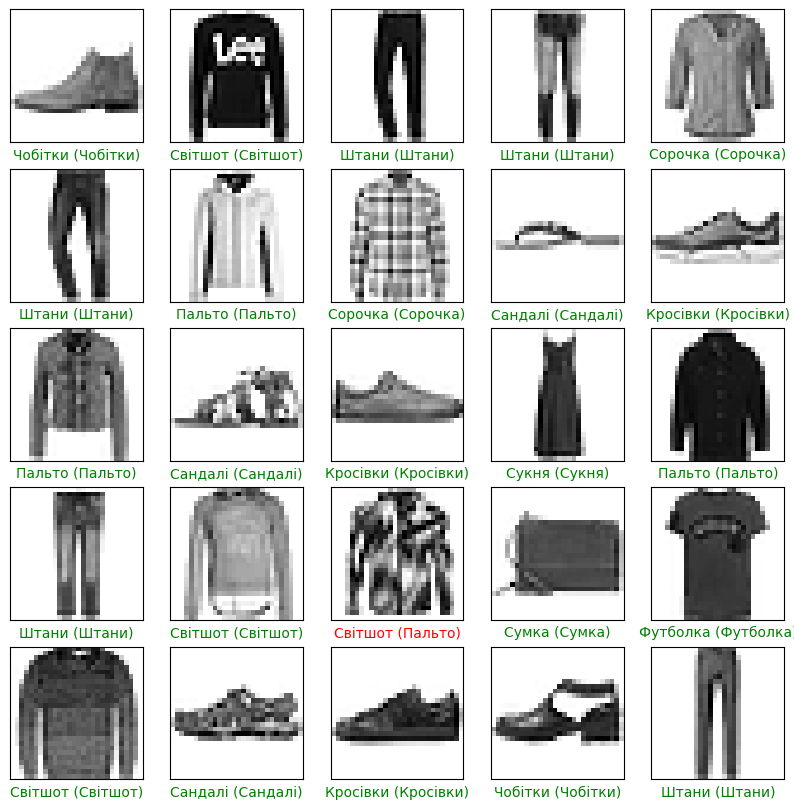

In [32]:
test_predictions = model.predict(test_images)
class_names = ["Футболка", "Штани", "Світшот", "Сукня", "Пальто", "Сандалі", "Сорочка", "Кросівки", "Сумка", "Чобітки"]

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(test_predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f"{class_names[predicted_label]} ({class_names[true_label]})", color=color)

Відображення графіків навчання

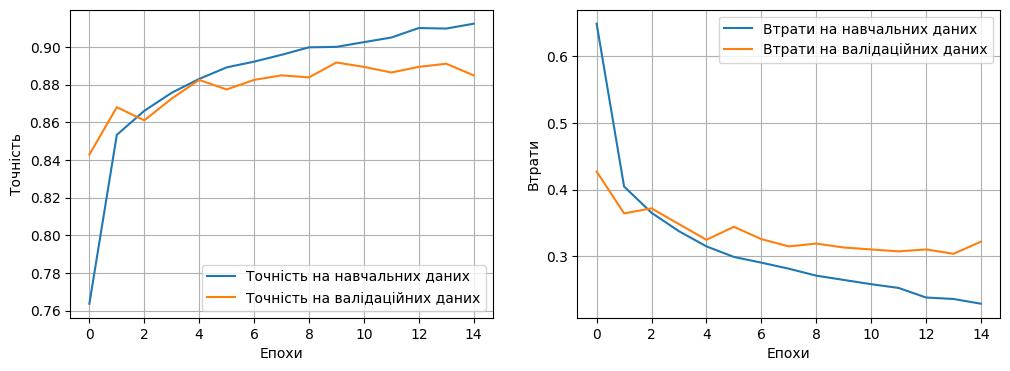

313/313 [==============================] - 1s 2ms/step - loss: 0.3507 - accuracy: 0.8817
Точність на тестовому наборі даних: 88.17%


In [33]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Точність на навчальних даних')
plt.plot(history.history['val_accuracy'], label='Точність на валідаційних даних')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Втрати на навчальних даних')
plt.plot(history.history['val_loss'], label='Втрати на валідаційних даних')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.legend()
plt.grid(True)

plt.show()

# Оцінка точності на тестовому наборі даних
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Точність на тестовому наборі даних: {test_acc * 100:.2f}%")


Висновок:
збільшення кількості шарів як і передбачалось веде до покращення результату навсання, а от dropout навпаки. модель без dropout показує кращий accuracy але щоб запобігти перенавчанню я залишив його з невеликими значеннями та додав метод регуляризації еarly stopping. Збільшення кількості епох та позмір батчу очікувано покращує модель